Text(0, 0.5, 'Log of Wealth, $\\ln(W)$')

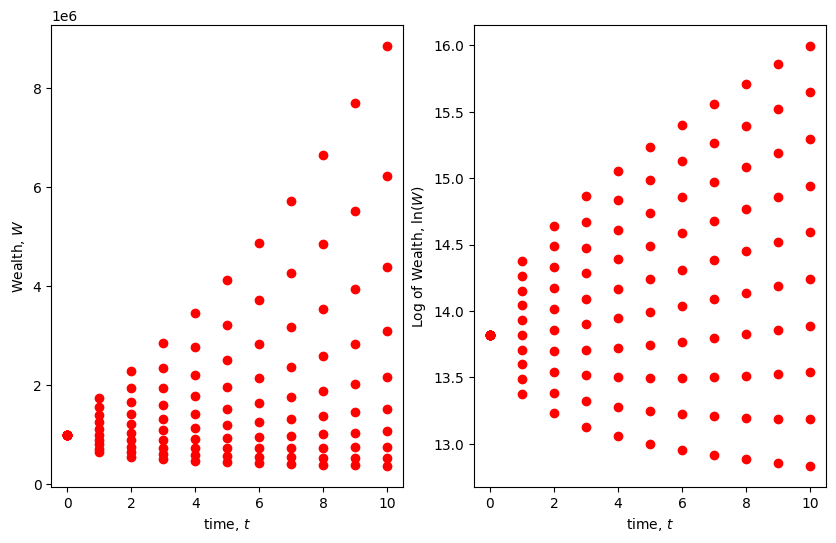

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp

W0 = 1000000
T = 10
nW = 10
mu_stock = 0.08
mu_bond = 0.045
sig_stock = 0.20
sig_bond = 0.0

lnW = np.zeros((nW,T+1))
W = np.zeros((nW, T+1))

for t in range(T+1):
    lnW_min = log(W0) + (mu_stock-0.5*sig_stock**2)*t - 2.5*sig_stock*sqrt(t)
    lnW_max = log(W0) + (mu_stock-0.5*sig_stock**2)*t + 2.5*sig_stock*sqrt(t)
    lnW[:,t] = np.linspace(lnW_min, lnW_max, nW)
W = np.exp(lnW)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)    
for t in range(T+1):
    plt.scatter(t*np.ones(nW), W[:,t], color='r')
plt.xlabel("time, $t$")
plt.ylabel("Wealth, $W$")
plt.subplot(1, 2, 2)
for t in range(T+1):
    plt.scatter(t*np.ones(nW), lnW[:,t], color='r')
plt.xlabel("time, $t$")
plt.ylabel("Log of Wealth, $\ln(W)$")

In [2]:
# Helper functions

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

def compute_mu_sigma(a):
    mu = a/(nA-1)*mu_stock + (1-a/(nA-1))*mu_bond
    sig = a/(nA-1)*sig_stock
    return mu, sig

def compute_midpoints(W):
    W_midpts = np.zeros((nW+1,T+1))
    W_midpts[0,:] = 0.000001
    W_midpts[nW,:] = np.inf
    W_midpts[1:nW,:] = (W[:nW-1,:]+W[1:nW,:])/2
    return W_midpts

def compute_transition_probs(w, t, a, W_midpts):
    mu, sig = compute_mu_sigma(a)
    W_tplus1_dist = np.zeros(nW)
    cdfs = norm.cdf(np.float64((np.log(W_midpts[:,t+1]/w) - (mu-0.5*sig*sig))
                               /sig))
    W_tplus1_dist = cdfs[1:nW+1] - cdfs[0:nW]
    return W_tplus1_dist

G = 2000000
nA = 21
V = np.zeros((nW, T+1))
A = np.zeros((nW, T))
EV = np.zeros(nA)
W_midpts = compute_midpoints(W)

for j in range(nW):
    if W[j, T] > G:
        V[j, T] = 1

for t in range(T-1, -1, -1):
    for j in range(nW):
        for a in range(nA):
            W_tplus1_dist = compute_transition_probs(W[j,t], t, a, W_midpts)
            EV[a] = np.dot(W_tplus1_dist, V[:, t+1])
        V[j,t] = EV.max()
        A[j,t] = EV.argmax()